## a)

In [2]:
from matplotlib import pyplot as plt

def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

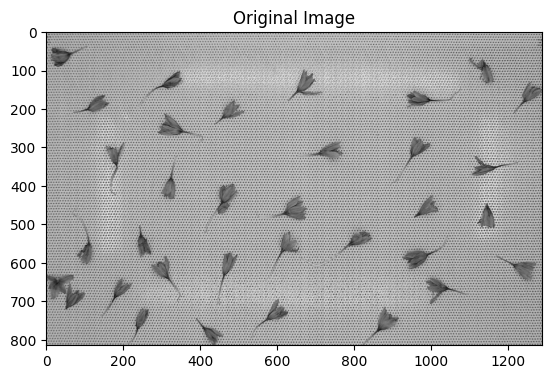

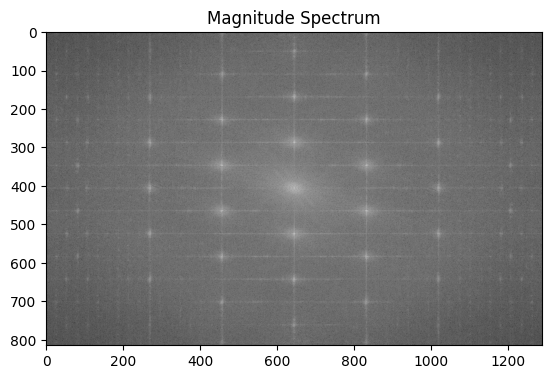

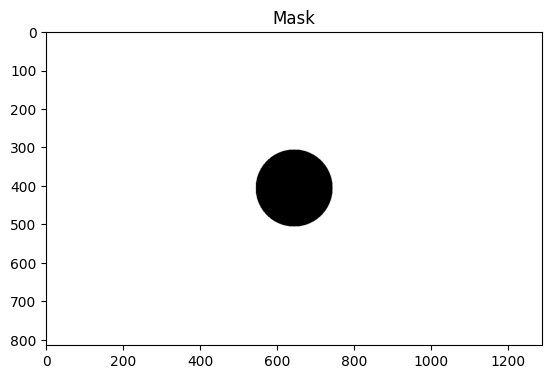

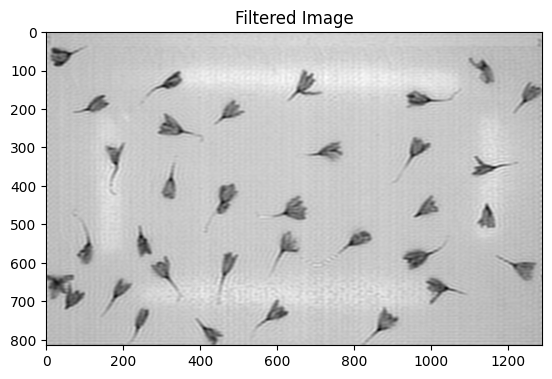

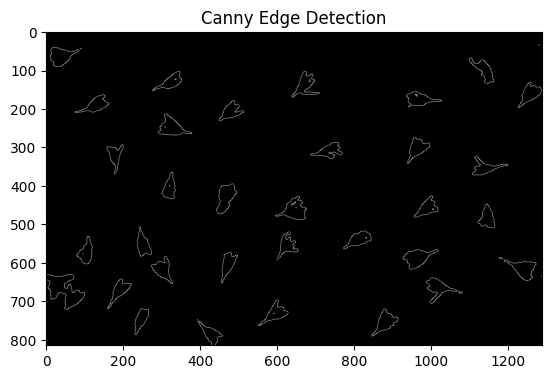

In [6]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Define a function to show images
def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

# Load the image
img = cv2.imread('images/saffrun.jpg', 0)
show_image(img, "Original Image")

# Apply Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
show_image(magnitude_spectrum, "Magnitude Spectrum")

# Create a mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[:, :] = 1
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0
show_image(mask*255, "Mask")

# Apply the mask
fshift_filtered = fshift * (1 - mask)
fshift_filtered_shifted = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(fshift_filtered_shifted)
img_back = np.real(img_back)
show_image(img_back, "Filtered Image")

# Apply Canny edge detection
threshold = 127
img_back[img_back < threshold] = 0
img_back[img_back >= threshold] = 255
canny = cv2.Canny(img_back.astype(np.uint8), 70, 100)
show_image(canny, "Canny Edge Detection")
